In [29]:
from sklearn.linear_model import Ridge, RidgeCV, LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer, make_column_selector

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

`ames_housing` is a pandas dataframe. The column `"SalePrice"` contains the target variable.

To simplify this exercise, we will only used the numerical features defined below:

In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

Start by fitting a ridge regressor (`sklearn.linear_model.Ridge`) fixing the penalty alpha to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argumentt `return_estimator=True` in `sklearn.model_selection.cross_validate` to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of `sklearn.preprocessing.StandardScaler` to scale the data before passing it to the regressor.

### **Question 1**
How large is the largest absolute value of the weight (coefficient) in this trained model?

In [4]:
preprocessor = StandardScaler()
linear_model = Ridge(alpha=0)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", linear_model)
])

cv_results = cross_validate(model, data_numerical, target, return_estimator=True, cv=10)

c:\Users\Felipe\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.33441e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Felipe\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.02231e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Felipe\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.66086e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [5]:
[est.steps[-1][-1].coef_.max() for est in cv_results["estimator"]]

[1.6641463698710573e+19,
 70203.83150644414,
 41509.28597352537,
 5.357127161377047e+18,
 3.822080636271345e+18,
 110871.04678825322,
 1.2331258634694683e+19,
 1.7939898188324393e+18,
 4.4405902833257426e+18,
 2.232602861943016e+18]

### **Question 2**

Repeat the same experiment by fitting a ridge regressor (`sklearn.linear_model.Ridge`) with the default parameter (i.e. `alpha=1.0`).

How large is the largest absolute value of the weight (coefficient) in this trained model?

In [6]:
preprocessor = StandardScaler()
linear_model = Ridge(alpha=1)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", linear_model)
])

cv_results = cross_validate(model, data_numerical, target, return_estimator=True, cv=10)
[est.steps[-1][-1].coef_.max() for est in cv_results["estimator"]]

[20867.286383258113,
 20329.01517192401,
 19764.50791273471,
 20169.592626079873,
 19571.095410466667,
 22562.769198255693,
 20127.65597364411,
 20032.645971187514,
 17142.309984207506,
 19144.189168867983]

### **Question 3**

What are the two most important features used by the ridge regressor? You can make a box-plot of the coefficients across all folds to get a good insight.

In [8]:
weights_ridge_full = []
for est in cv_results["estimator"]:
    coefs = est[-1].coef_
    weights_ridge_full.append(pd.Series(coefs, index=numerical_features))

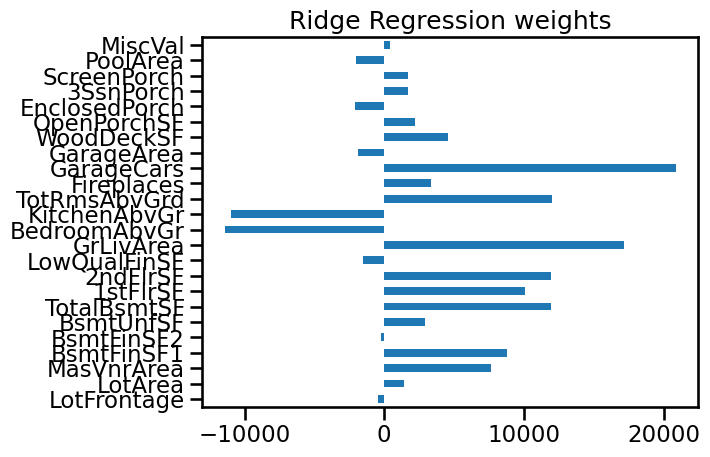

In [9]:

weights_ridge_full[0].plot.barh()
_ = plt.title("Ridge Regression weights")

In [13]:
np.std([weight["GarageCars"] for weight in weights_ridge_full])

2746.711032908569

### **Question 4**

Remove the feature `"GarageArea"` from the dataset and repeat the previous experiment.

What is the impact on the weights of removing `"GarageArea"` from the dataset?

In [10]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

preprocessor = StandardScaler()
linear_model = Ridge(alpha=1)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", linear_model)
])

cv_results = cross_validate(model, data_numerical, target, return_estimator=True, cv=10)
[est.steps[-1][-1].coef_.max() for est in cv_results["estimator"]]

[19375.93077464495,
 18455.992304480784,
 18775.604731763317,
 18608.86258231994,
 19829.484415585335,
 19963.35113755686,
 19367.131900242166,
 19515.985783731874,
 17357.54715837945,
 19079.74356409345]

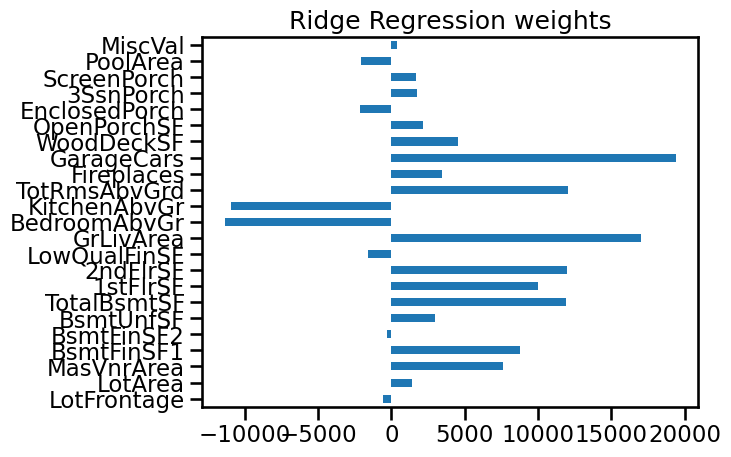

In [11]:
weights_ridge = []
for est in cv_results["estimator"]:
    coefs = est[-1].coef_
    weights_ridge.append(pd.Series(coefs, index=numerical_features))

weights_ridge[0].plot.barh()
_ = plt.title("Ridge Regression weights")

In [12]:
np.std([weight["GarageCars"] for weight in weights_ridge])

1238.1639448945505

### **Question 6**

Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a `sklearn.linear_model.RidgeCV` instead of a `Ridge` regressor on the numerical data without the `"GarageArea"` column. Pass `alphas=np.logspace(-3, 3, num=101)` to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature `"GarageCars"`?

In [14]:


preprocessor = StandardScaler()

alphas=np.logspace(-3, 3, num=101)
linear_model = RidgeCV(alphas=alphas, store_cv_values=True)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", linear_model)
])


cv_results = cross_validate(model, data_numerical, target,
                            cv=10, scoring="neg_mean_absolute_error",
                            return_train_score=True,
                            return_estimator=True)


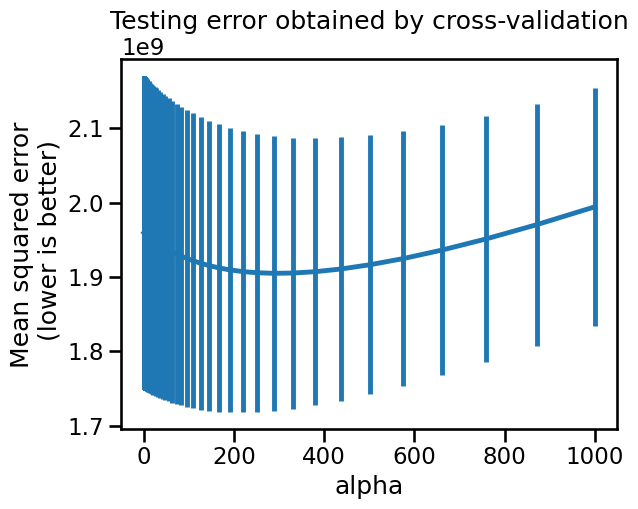

In [15]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas = cv_alphas.aggregate(["mean", "std"]).T

plt.errorbar(cv_alphas.index, cv_alphas["mean"],
             yerr=cv_alphas["std"])
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Testing error obtained by cross-validation")

In [16]:

np.std([pd.Series(est[-1].coef_, index=numerical_features)["GarageCars"] for est in cv_results["estimator"]])

557.3966573852641

### **Question 7**

Check the parameter `alpha_` (the regularization strength) for the different ridge regressors obtained on each fold.

In which range does `alpha_` fall into for most folds?

In [18]:
[est[-1].alpha_ for est in cv_results["estimator"]]

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with **numerical features**

In [19]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [20]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

### **Question 8**
How many numerical features are present in the dataset contained in the variable `data`?

In [21]:
data.head(), target.head()

(   age  capital-gain  capital-loss  hours-per-week
 0   25             0             0              40
 1   38             0             0              50
 2   28             0             0              40
 3   44          7688             0              40
 4   18             0             0              30,
 0     <=50K
 1     <=50K
 2      >50K
 3      >50K
 4     <=50K
 Name: class, dtype: object)

### **Question 9**

Compare the generalization performance using the accuracy of the two following predictive models using a 10-fold cross-validation:

* a linear model composed of a `StandardScaler` and a `LogisticRegression`
* a `DummyClassifier` predicting the most frequent class

By comparing the cross-validation test scores of both models fold-to-fold, count the number of times the linear model has a better test score than the dummy classifier.

In [22]:

preprocessor = StandardScaler()
logistic_model = LogisticRegression()

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", logistic_model)
])

dummy_model = DummyClassifier(strategy="most_frequent")

cv_results = cross_validate(model, data, target,
                            cv=10, scoring="balanced_accuracy",
                            return_train_score=True,
                            return_estimator=True)

dummy_cv_results = cross_validate(dummy_model, data, target,
                            cv=10, scoring="balanced_accuracy",
                            return_train_score=True,
                            return_estimator=True)

In [23]:
cv_results["test_score"], dummy_cv_results["test_score"]

(array([0.62222238, 0.6152301 , 0.6177696 , 0.62814173, 0.62371391,
        0.62086206, 0.61685408, 0.61953102, 0.63502459, 0.62907536]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]))

In [24]:
cv_results["estimator"][0][-1].coef_

array([[0.52204276, 2.4667774 , 0.30602977, 0.53963505]])

### **Question 10**
What is the most important feature seen by the logistic regression?

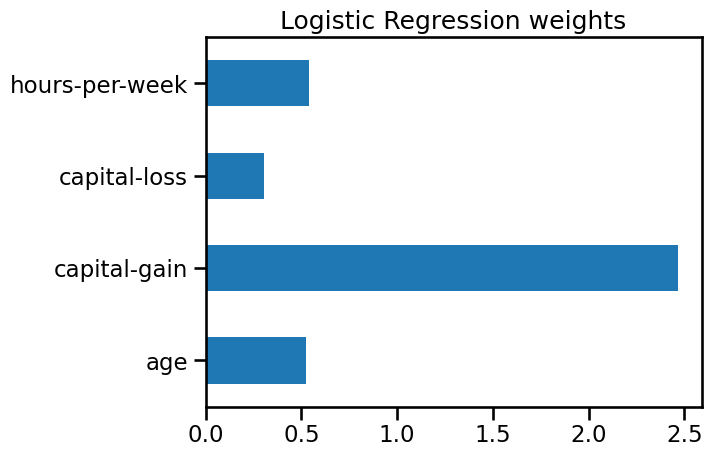

In [25]:
weights_logistic = []
for est in cv_results["estimator"]:
    coefs = est[-1].coef_[0]
    weights_logistic.append(pd.Series(coefs, index=[c for c in data.columns]))

weights_logistic[0].plot.barh()
_ = plt.title("Logistic Regression weights")

Now, we will work with **both numerical and categorical features**.

In [26]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [28]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


### **Question 11**

Create a predictive model where the categorical data must be one-hot encoded, the numerical data must be scaled, and the predictor is a logistic regression classifier.

Use the same 10-fold cross-validation strategy as above to evaluate this complex pipeline.

Look at the cross-validation test scores for both models and count the number of times the model using both numerical and categorical features has a better test score than the model using only numerical features.

In [32]:
numerical_columns_selector = make_column_selector(dtype_exclude=object)
categorical_columns_selector = make_column_selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

categorical_columns, numerical_columns, data.columns

(['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'],
 ['age', 'capital-gain', 'capital-loss', 'hours-per-week'],
 Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country'],
       dtype='object'))

In [49]:

numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

logistic_model = LogisticRegression()

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", logistic_model)
])

cat_num_cv_results = cross_validate(model, data, target,
                            cv=10, scoring="balanced_accuracy",
                            return_train_score=True,
                            return_estimator=True)


c:\Users\Felipe\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Felipe\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [50]:
cat_num_cv_results["test_score"], cv_results["test_score"]

(array([0.76413845, 0.76412418, 0.76237429, 0.76316917, 0.76201948,
        0.75758842, 0.77043475,        nan, 0.77376069, 0.77049174]),
 array([0.62222238, 0.6152301 , 0.6177696 , 0.62814173, 0.62371391,
        0.62086206, 0.61685408, 0.61953102, 0.63502459, 0.62907536]))

For the following questions, you can use the following snippet to get the feature names after the preprocessing performed.

In [59]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
len(feature_names), len(cat_num_cv_results["estimator"][0][-1].coef_)

(106, 1)

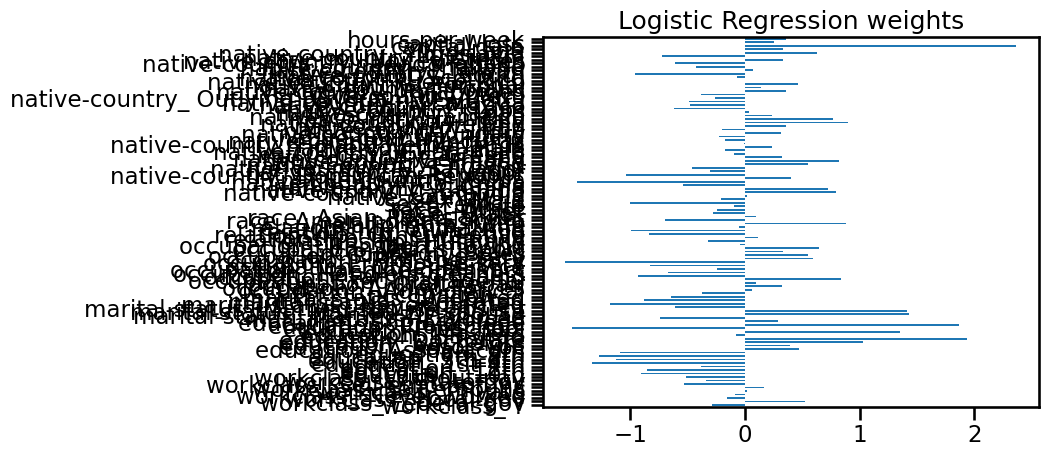

In [63]:
weights_cat_num = []
for est in cat_num_cv_results["estimator"]:
    coefs = est[-1].coef_[0]
    try:
        weights_cat_num.append(pd.Series(coefs, index=feature_names))
    except:
        pass

weights_cat_num[0].plot.barh()
_ = plt.title("Logistic Regression weights")

In [71]:
weights_cat_num[0].sort_values()

occupation_ Priv-house-serv          -1.566563
education_ Preschool                 -1.504998
native-country_ Columbia             -1.462892
education_ 1st-4th                   -1.334986
education_ 7th-8th                   -1.270232
                                        ...   
marital-status_ Married-civ-spouse    1.411166
marital-status_ Married-AF-spouse     1.433742
education_ Prof-school                1.865019
education_ Doctorate                  1.933379
capital-gain                          2.365760
Length: 106, dtype: float64